In [24]:
!pip install yfinance tensorflow scikit-learn

In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
LOOKBACK = 60
EPOCHS = 15
BATCH_SIZE = 32
INTERVAL = "1d"
PERIOD = "5y"

ASSETS = ["AAPL", "GC=F", "EURUSD=X"]

In [27]:
def prepare_asset(ticker, lookback):

    df = yf.download(ticker, period=PERIOD, interval=INTERVAL)
    df = df[['Close']].dropna()

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[['Close']])

    X, y = [], []

    for i in range(lookback, len(scaled)):
        X.append(scaled[i-lookback:i])
        y.append(scaled[i])

    X = np.array(X)
    y = np.array(y)

    return X, y, scaler, df

In [28]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(LOOKBACK, 1)))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
scalers = {}

for asset in ASSETS:

    print(f"\nTraining on {asset}...\n")

    X, y, scaler, df = prepare_asset(asset, LOOKBACK)
    model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),  # use object, not 'mse' string
    metrics=[tf.keras.metrics.MeanSquaredError()]
                             )
    model.fit(
          X, y,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1
    )

    scalers[asset] = scaler

print("Training Complete.")

/tmp/ipython-input-2161846864.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=PERIOD, interval=INTERVAL)



Training on AAPL...



[*********************100%***********************]  1 of 1 completed

Epoch 1/15


38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 9/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 10/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 11/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss

/tmp/ipython-input-2161846864.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=PERIOD, interval=INTERVAL)
[*********************100%***********************]  1 of 1 completed


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 4.8865e-04 - mean_squared_error: 4.8865e-04
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 5.0447e-04 - mean_squared_error: 5.0447e-04
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 6.9266e-04 - mean_squared_error: 6.9266e-04
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 9.7757e-04 - mean_squared_error: 9.7757e-04
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 7.6206e-04 - mean_squared_error: 7.6206e-04
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 5.9716e-04 - mean_squared_error: 5.9716e-04
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 6.0144e-04 - mean_squared_error: 6.0144e-04
Epoch 9/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 6.8995e-04 - mean_squared_error: 6.8995e-04
Epoch 10/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 5.5407e-04 - mean_squ

/tmp/ipython-input-2161846864.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=PERIOD, interval=INTERVAL)
[*********************100%***********************]  1 of 1 completed

Epoch 1/15


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 9/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 10/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 11/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 

In [30]:

model.save("universal_lstm.h5")
joblib.dump(scalers, "universal_scalers.save")

['universal_scalers.save']

In [31]:
TEST_PERIOD = "6mo"
TEST_ASSET = "AAPL"  # change to test others

model = tensorflow.keras.models.load_model("universal_lstm.h5")
scalers = joblib.load("universal_scalers.save")

# Download new unseen data
df_test = yf.download(TEST_ASSET, period=TEST_PERIOD, interval=INTERVAL)
df_test = df_test[['Close']].dropna()

scaler = scalers[TEST_ASSET]
scaled = scaler.transform(df_test[['Close']])

X_test, y_test = [], []

for i in range(LOOKBACK, len(scaled)):
    X_test.append(scaled[i-LOOKBACK:i])
    y_test.append(scaled[i])

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Test Shape:", X_test.shape)

/tmp/ipython-input-3884962043.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_test = yf.download(TEST_ASSET, period=TEST_PERIOD, interval=INTERVAL)
[*********************100%***********************]  1 of 1 completed

Test Shape: (65, 60, 1)


In [32]:
predictions = model.predict(X_test, verbose=0)

pred_real = scaler.inverse_transform(predictions)
y_real = scaler.inverse_transform(y_test)

In [33]:
mae = mean_absolute_error(y_real, pred_real)
rmse = np.sqrt(mean_squared_error(y_real, pred_real))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 4.418038940429687
RMSE: 5.620289955873392


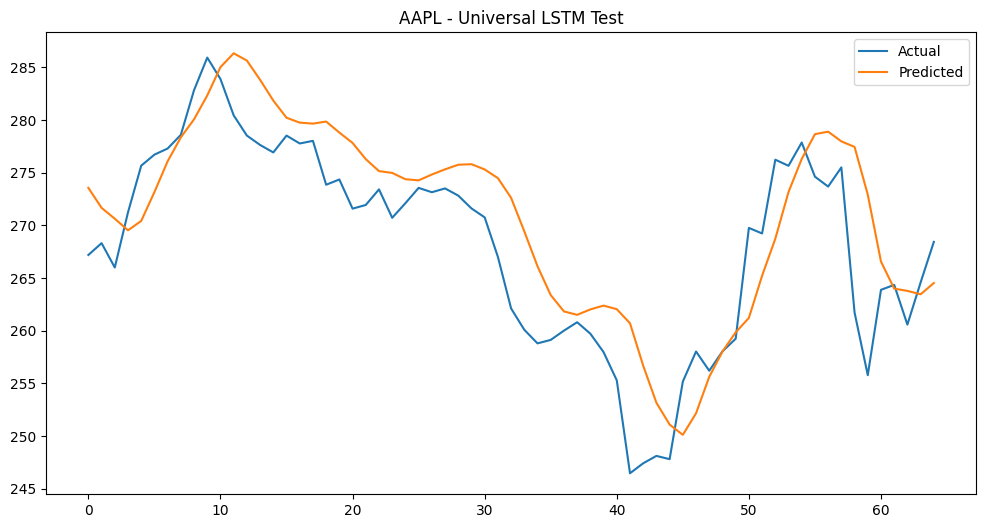

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_real, label="Actual")
plt.plot(pred_real, label="Predicted")
plt.title(f"{TEST_ASSET} - Universal LSTM Test")
plt.legend()
plt.show()

In [1]:
!pip install tf2onnx

In [3]:
import tensorflow as tf
import tf2onnx
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanSquaredError

LOOKBACK = 60  # your model input sequence length

# Load your model
model = load_model("universal_lstm.h5", custom_objects={"mse": MeanSquaredError()})

# Rebuild model to avoid the output_names error
inputs = tf.keras.Input(shape=(LOOKBACK, 1), name="input")
outputs = model(inputs)
new_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Convert to ONNX
spec = (tf.TensorSpec((None, LOOKBACK, 1), tf.float32, name="input"),)
output_path = "universal_lstm.onnx"

model_proto, _ = tf2onnx.convert.from_keras(new_model, input_signature=spec, output_path=output_path)
print(f"ONNX model saved to {output_path}")

ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7d2207025c60>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7d2207025c60>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7d2207025c60>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7d2207025c60>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.
ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7d2207025c60>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


ONNX model saved to universal_lstm.onnx
